# Movie Recommender System - A CS 4675 Project
 Author: Shiyi Wang

## Dataset Preparation

### Loading Dataset

Remark on dataset choice: 

The dataset provided on Canvas does not include Movie names. Therefore, it is hard to evaluate the accuracy.
 
Therefore, the dataset I choose is [MovieLens 20M Dataset](https://www.kaggle.com/grouplens/movielens-20m-dataset?select=movie.csv). 

* The datasets describe ratings and free-text tagging activities from MovieLens, a movie recommendation service.

* It contains 20,000,263 ratings across 27,278 movies. These data were created by 138493 users between 1995 and 2015.

There are two files: `movie.csv` and `rating.csv`.

* `movie.csv`: it contains movie information, including `movieId`, `title`, and `genres`.

* `rating.csv`: it contains ratings of movies by users, including `userId`, `movieId`, `rating`, and `timestamp`.

Given that both file contains the attribute `movieId`, we can merge them together.




First, we import pandas to process dataframes.

In [2]:
import pandas as pd
import numpy as np
from pprint import pprint

Now we can load our datasets. 

Note: I dropped the `timestamp` and `genres` columns in `movie.csv` since we don't need them until analysis.

In [3]:
ratings = pd.read_csv('rating.csv', usecols=['userId','movieId','rating'])
movies = pd.read_csv('movie.csv', usecols=['movieId','title'])

Since both dataframes contain the `movieId` column, we can merge them together.

In [4]:
movie_ratings = ratings.join(movies.set_index('movieId'), on = 'movieId')

Let's examine our joined dataframe.

In [5]:
movie_ratings

,userId,movieId,rating,title
0,1,2,3.5,Jumanji (1995)
1,1,29,3.5,"City of Lost Children, The (Cité des enfants p..."
2,1,32,3.5,Twelve Monkeys (a.k.a. 12 Monkeys) (1995)
3,1,47,3.5,Seven (a.k.a. Se7en) (1995)
4,1,50,3.5,"Usual Suspects, The (1995)"
...,...,...,...,...
20000258,138493,68954,4.5,Up (2009)
20000259,138493,69526,4.5,Transformers: Revenge of the Fallen (2009)
20000260,138493,69644,3.0,Ice Age: Dawn of the Dinosaurs (2009)
20000261,138493,70286,5.0,District 9 (2009)


### Data Visualization

We can find the count, mean, standard deviation, and percentile information of each movie's rating.

In [6]:
movie_ratings.groupby('title')['rating'].describe()

,count,mean,std,min,25%,50%,75%,max
title,,,,,,,,
#chicagoGirl: The Social Network Takes on a Dictator (2013),3.0,3.666667,1.154701,3.0,3.000,3.00,4.00,5.0
$ (Dollars) (1971),24.0,2.833333,1.138904,0.5,2.500,3.00,3.50,4.5
$5 a Day (2008),39.0,2.871795,1.122251,0.5,2.250,3.00,3.50,4.5
$9.99 (2008),55.0,3.009091,1.211408,0.5,2.500,3.00,4.00,5.0
$ellebrity (Sellebrity) (2012),2.0,2.000000,2.121320,0.5,1.250,2.00,2.75,3.5
...,...,...,...,...,...,...,...,...
À propos de Nice (1930),4.0,3.125000,0.478714,2.5,2.875,3.25,3.50,3.5
Árido Movie (2005),1.0,2.000000,NaN,2.0,2.000,2.00,2.00,2.0
Åsa-Nisse - Wälkom to Knohult (2011),2.0,1.500000,0.000000,1.5,1.500,1.50,1.50,1.5


In [7]:
ratings_mean = movie_ratings.groupby('title')['rating'].describe()['mean']
ratings_count = movie_ratings.groupby('title')['rating'].describe()['count']
ratings_mean_count_merged = pd.concat([ratings_count, ratings_mean], axis = 1)
ratings_mean_count_merged.reset_index()

,title,count,mean
0,#chicagoGirl: The Social Network Takes on a Di...,3.0,3.666667
1,$ (Dollars) (1971),24.0,2.833333
2,$5 a Day (2008),39.0,2.871795
3,$9.99 (2008),55.0,3.009091
4,$ellebrity (Sellebrity) (2012),2.0,2.000000
...,...,...,...
26724,À propos de Nice (1930),4.0,3.125000
26725,Árido Movie (2005),1.0,2.000000
26726,Åsa-Nisse - Wälkom to Knohult (2011),2.0,1.500000
26727,Üvegtigris (2001),1.0,3.000000


We can also find the mean rating frequency distribution below.

<AxesSubplot:ylabel='Frequency'>

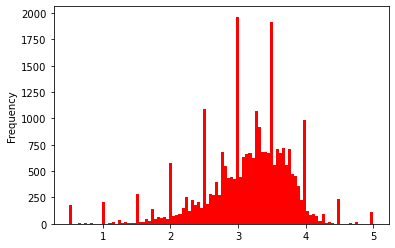

In [9]:
ratings_mean_count_merged['mean'].plot(bins=100, kind='hist', color = 'r') 

Similarly, we can also find the distribution of count frequency.

<AxesSubplot:ylabel='Frequency'>

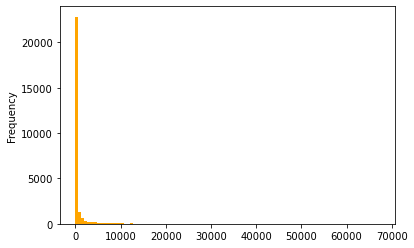

In [10]:
ratings_mean_count_merged['count'].plot(bins=100, kind='hist', color = 'orange')

Finally, let's take a look at the most rated movies.

In [11]:
ratings_mean_count_merged.sort_values('count', ascending = False).head(100)

,count,mean
title,,
Pulp Fiction (1994),67310.0,4.174231
Forrest Gump (1994),66172.0,4.029000
"Shawshank Redemption, The (1994)",63366.0,4.446990
"Silence of the Lambs, The (1991)",63299.0,4.177057
Jurassic Park (1993),59715.0,3.664741
...,...,...
"Net, The (1995)",24618.0,3.110427
Rain Man (1988),24591.0,3.899170
There's Something About Mary (1998),24582.0,3.546294


### Data Preprocessing

We trauncate the dataframe to 700,000 rows so that it won't overflow the pivot table while maintaining the recommendation performance.

In [12]:
movie_ratings = movie_ratings.drop(movie_ratings.index[700000:])

We have completed the dataframe preprocessing.

In [13]:
movie_ratings

,userId,movieId,rating,title
0,1,2,3.5,Jumanji (1995)
1,1,29,3.5,"City of Lost Children, The (Cité des enfants p..."
2,1,32,3.5,Twelve Monkeys (a.k.a. 12 Monkeys) (1995)
3,1,47,3.5,Seven (a.k.a. Se7en) (1995)
4,1,50,3.5,"Usual Suspects, The (1995)"
...,...,...,...,...
699995,4640,1517,4.0,Austin Powers: International Man of Mystery (1...
699996,4640,1580,4.0,Men in Black (a.k.a. MIB) (1997)
699997,4640,1645,5.0,"Devil's Advocate, The (1997)"
699998,4640,1717,4.0,Scream 2 (1997)


## Similarity Matrix

### Movie Similarity

Now we can create a matrix with `userId` as columns and `title` as rows.

In [14]:
mat = movie_ratings.pivot_table(index=['title','movieId'],columns='userId',values=['rating']).fillna(0).sort_values(by='movieId')

In [15]:
mat

rating                           \
userId                                       1    2    3    4    5    6      
title                              movieId                                   
Toy Story (1995)                   1          0.0  0.0  4.0  0.0  0.0  5.0   
Jumanji (1995)                     2          3.5  0.0  0.0  0.0  3.0  0.0   
Grumpier Old Men (1995)            3          0.0  4.0  0.0  0.0  0.0  3.0   
Waiting to Exhale (1995)           4          0.0  0.0  0.0  0.0  0.0  0.0   
Father of the Bride Part II (1995) 5          0.0  0.0  0.0  0.0  0.0  0.0   
...                                           ...  ...  ...  ...  ...  ...   
Clown (2014)                       130052     0.0  0.0  0.0  0.0  0.0  0.0   
Cinderella (2015)                  130073     0.0  0.0  0.0  0.0  0.0  0.0   
The Dark Knight (2011)             130219     0.0  0.0  0.0  0.0  0.0  0.0   
Insurgent (2015)                   130490     0.0  0.0  0.0  0.0  0.0  0.0   
Backcountry (2014)                 130642     0.0  0.0  0.0  0.0  0.0  0.0   

                                                                ...            \
userId                                     7    8    9    10    ... 4631 4632   
title                              movieId                      ...             
Toy Story (1995)                   1        0.0  4.0  0.0  4.0  ...  0.0  0.0   
Jumanji (1995)                     2        0.0  0.0  0.0  0.0  ...  0.0  0.0   
Grumpier Old Men (1995)            3        3.0  5.0  0.0  0.0  ...  0.0  0.0   
Waiting to Exhale (1995)           4        0.0  0.0  0.0  0.0  ...  0.0  0.0   
Father of the Bride Part II (1995) 5        0.0  0.0  0.0  0.0  ...  0.0  0.0   
...                                         ...  ...  ...  ...  ...  ...  ...   
Clown (2014)                       130052   0.0  0.0  0.0  0.0  ...  0.0  0.0   
Cinderella (2015)                  130073   0.0  0.0  0.0  0.0  ...  0.0  0.0   
The Dark Knight (2011)             130219   0.0  0.0  0.0  0.0  ...  0.0  0.0   
Insurgent (2015)                   130490   0.0  0.0  0.0  0.0  ...  0.0  0.0   
Backcountry (2014)                 130642   0.0  0.0  0.0  0.0  ...  0.0  0.0   

                                                                               \
userId                                     4633 4634 4635 4636 4637 4638 4639   
title                              movieId                                      
Toy Story (1995)                   1        0.0  3.0  3.0  5.0  0.0  0.0  0.0   
Jumanji (1995)                     2        0.0  3.0  0.0  0.0  0.0  0.0  0.0   
Grumpier Old Men (1995)            3        0.0  0.0  0.0  0.0  0.0  0.0  0.0   
Waiting to Exhale (1995)           4        0.0  0.0  0.0  0.0  0.0  0.0  0.0   
Father of the Bride Part II (1995) 5        0.0  0.0  0.0  0.0  0.0  0.0  0.0   
...                                         ...  ...  ...  ...  ...  ...  ...   
Clown (2014)                       130052   0.0  0.0  0.0  0.0  0.0  0.0  0.0   
Cinderella (2015)                  130073   0.0  0.0  0.0  0.0  0.0  0.0  0.0   
The Dark Knight (2011)             130219   0.0  0.0  0.0  0.0  0.0  0.0  0.0   
Insurgent (2015)                   130490   0.0  0.0  0.0  0.0  0.0  0.0  0.0   
Backcountry (2014)                 130642   0.0  0.0  0.0  0.0  0.0  0.0  0.0   

                                                 
userId                                     4640  
title                              movieId       
Toy Story (1995)                   1        0.0  
Jumanji (1995)                     2        4.0  
Grumpier Old Men (1995)            3        0.0  
Waiting to Exhale (1995)           4        0.0  
Father of the Bride Part II (1995) 5        0.0  
...                                         ...  
Clown (2014)                       130052   0.0  
Cinderella (2015)                  130073   0.0  
The Dark Knight (2011)             130219   0.0  
Insurgent (2015)                   130490   0.0  
Backcountry (2014)            

The entries in `mat` are mostly 0s since most users have not seen most movies. 

However, if an user has rated a movie, the entry that corresponds to the `userId` and `title` is the user's rating of the movie.

To create a movie similarity matrix based on **cosine similarity**, we need to import [`NearestNeighbors`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html) from scikit-learn.

In [16]:
from sklearn.neighbors import NearestNeighbors

We set the `metric` to `cosine`, `algorithm` to `brute`, and `n_neighbors` to `6`.

Note: we use `brute` because fitting on sparse input will override the setting of this parameter to brute force.

Note: `n_neighbors` is set to `6` because the most similar movie is the movie itself.

In [17]:
knn = NearestNeighbors(metric='cosine', algorithm='brute')
knn.fit(mat.values)
neigh_dist, neigh_ind = knn.kneighbors(mat.values, n_neighbors=6)

`neigh_ind` describes the nearest neghbor movies of each movie. Each row in `neigh_ind` corresponds to each row in `mat`.

In [ ]:
neigh_ind

array([[    0,   253,   743,  1145,  2919,  1203],
       [    1,   359,   356,   488,   468,   570],
       [    2,     4,   702,   749,   751,   482],
       ...,
       [13324, 13380, 13211,  9336, 13081, 13180],
       [13381,  9613, 11630, 12499,  6177, 12528],
       [ 7664, 12701,  8898, 12622, 11654, 12610]])

In each row in `neigh_ind`, the movies are ranked from the most similar movie to the least similar movie. 

`neigh_dist` describes the distance from each neighbor movie to the target movie. 



In [ ]:
neigh_dist

array([[0.        , 0.42265154, 0.42947531, 0.44775331, 0.44923923,
        0.45268639],
       [0.        , 0.47450917, 0.4961168 , 0.49966338, 0.50476266,
        0.5140506 ],
       [0.        , 0.51050749, 0.57075452, 0.58131416, 0.58538633,
        0.58723462],
       ...,
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.2       ],
       [0.        , 0.03847605, 0.03847605, 0.03847605, 0.03847605,
        0.03847605],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ]])

It is intuitive that the values in each row is in ascending order since they are getting less similar.

Based on the similarity matrix, now we can output the most similarly rated movies by unpacking the numpy arrays `neigh_ind` and `neigh_dist` above.

In [ ]:
def similarlyRatedMovies(num_movies):

    print('Finding ' + str(num_movies) + ' similarly rated movies: \n')
    
    count = 0

    for title in mat.index:

        # Note that we examine 3 movies for analysis per requirement.
        if (count == num_movies):
            break

        # First, we need to retrieve the index of the input movie
        input_movie_ind = mat.index.tolist().index(title)

        # Note that our index is tuple (title, movieId). Here we slice it to only ouput the name of the movie.
        print('The top 5 most similarly rated movies of ' +
              str(mat.index[input_movie_ind][0])+' are:')

        # We store all the neighbor movies in a list
        neigh_movies = neigh_ind[input_movie_ind].tolist()

        # We also need to store the distances of each neighbor to the input movie
        neigh_movies_dist = neigh_dist[input_movie_ind].tolist()

        # To enable calculation, we need to know the index and distance of the input movie
        input_movie_origin = neigh_movies.index(input_movie_ind)

        # Now, we can remove the input movie since we don't need to recommend the movie itself
        neigh_movies.remove(input_movie_ind)
        neigh_movies_dist.pop(input_movie_origin)

        # Record the order
        rank = 1

        # Query each neighbor movie and output specs
        for neigh_movie in neigh_movies:
            print('No.' + str(rank) + ': ' +
                  str(mat.index[neigh_movie][0])+', with distance ' + str(neigh_movies_dist[rank-1]))
            rank += 1

        print('\n')

        # Increment number of movies handled
        count += 1


Let's try find three target movies' neighbors.

In [ ]:
similarlyRatedMovies(3)

Finding 3 similarly rated movies: 

The top 5 most similarly rated movies of Toy Story (1995) are:
No.1: Star Wars: Episode IV - A New Hope (1977), with distance 0.4226515398719132
No.2: Independence Day (a.k.a. ID4) (1996), with distance 0.4294753071589563
No.3: Star Wars: Episode VI - Return of the Jedi (1983), with distance 0.4477533119844487
No.4: Toy Story 2 (1999), with distance 0.4492392254654526
No.5: Back to the Future (1985), with distance 0.4526863884459026


The top 5 most similarly rated movies of Jumanji (1995) are:
No.1: Mask, The (1994), with distance 0.4745091705417712
No.2: Lion King, The (1994), with distance 0.4961167994981186
No.3: Mrs. Doubtfire (1993), with distance 0.4996633824666885
No.4: Jurassic Park (1993), with distance 0.5047626585955509
No.5: Home Alone (1990), with distance 0.5140506036160686


The top 5 most similarly rated movies of Grumpier Old Men (1995) are:
No.1: Father of the Bride Part II (1995), with distance 0.5105074861100034
No.2: Twister (19

Analysis: Yes, I mostly agree with the recoomendations. The recommendations seems consistent. The movie release years are also similar. This indicates that these movies are probably rated together.

* In the first set of recommendations for Toy Story (1995),
    * Toy Story (1995) and Toy Story 2 (1999) are filmed in series.
    * Coincidentally, Toy Story 2 (1999) was [released in theaters the same year as Star Wars Episode I: The Phantom Menace](https://pixar.fandom.com/wiki/Star_Wars_References_in_Pixar_Productions).
* In the second set of recommendations for Jumanji (1995) (Adventure|Children|Fantasy), the recommended movies are 
    * The Lion King (1994) is *Adventure*|Animation|*Children*|Drama|Musical|IMAX 
    * Mrs. Doubtfire (1993) is Comedy|*Drama* 
    * Jurassic Park (1993) is Action|*Adventure*|Sci-Fi|Thriller 
    * Home Alone (1990) is *Children*|Comedy
* In the third set of recommendations, Grumpier Old Men (1995) is Comedy|Romance.
    * Father of the Bride Part II (1995) is *Comedy* 
    * Twister (1996) is Action|Adventure|*Romance*|Thriller
    * Eraser (1996) is Action|Drama|*Thriller*
    * Executive Decision (1996) is Action|Adventure|*Thriller*.

### User Similarity

Now, let's transpose `mat` and find the user similarity matrix.

In [ ]:
tmat = movie_ratings.pivot_table(index = 'userId', columns = 'title',values = 'rating').fillna(0)
tmat

title,$5 a Day (2008),'71 (2014),'Hellboy': The Seeds of Creation (2004),'Neath the Arizona Skies (1934),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),...,[REC] (2007),[REC]² (2009),"\\""Great Performances\""\"" Cats (1998)""",eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nos amours (1983),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4636,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4637,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4638,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


The columns and rows are swapped from `mat`. Now, the similarity matrix is able to tell the similarity between users.

We can apply the same logic here.

In [ ]:
from sklearn.neighbors import NearestNeighbors
knn = NearestNeighbors(metric='cosine', algorithm='brute')
knn.fit(tmat.values)
user_neigh_dist, user_neigh_ind = knn.kneighbors(tmat.values, n_neighbors=6)

User Similarity Matrices are shown below.

In [ ]:
user_neigh_ind

array([[   0, 2594, 1747, 1838,  146, 4420],
       [   1, 3509, 2181, 3297, 2001, 1091],
       [   2,  474, 1175, 1846, 1106, 2923],
       ...,
       [4637, 1284,  194, 3501, 3006, 3102],
       [4638, 4265, 3501,  194, 2140, 2644],
       [4639,   77, 1943,  452, 3684, 1006]])

In [ ]:
user_neigh_dist

array([[1.11022302e-16, 5.84641214e-01, 6.18955188e-01, 6.50451289e-01,
        6.51675425e-01, 6.51918429e-01],
       [0.00000000e+00, 6.15645239e-01, 6.47619059e-01, 6.75994885e-01,
        6.81983213e-01, 6.83178986e-01],
       [0.00000000e+00, 5.01885587e-01, 5.05011276e-01, 5.33630046e-01,
        5.48234070e-01, 5.50334659e-01],
       ...,
       [0.00000000e+00, 5.02309813e-01, 5.19370286e-01, 5.47746511e-01,
        5.48231025e-01, 5.63428249e-01],
       [3.33066907e-16, 7.25271570e-01, 7.44864046e-01, 7.54825711e-01,
        7.64966449e-01, 7.76313939e-01],
       [1.11022302e-16, 7.45365832e-01, 7.63225677e-01, 7.63451284e-01,
        7.71552010e-01, 7.76351595e-01]])

Based on the similarity matrix, now we can output the most similarly rated movies by unpacking the numpy arrays `user_neigh_ind` and `user_neigh_dist` above.

In [ ]:
def similarUsers(userId):

    print('Finding similar taste users for user ' + str(userId) + '\n')

    # First, we need to retrieve the index of the input user
    input_user_ind = tmat.index.tolist().index(userId)

    # Helper print statement
    print('The top five most similar users of user ' +
            str(tmat.index[input_user_ind])+' are:')

    # We store all the neighbor movies in a list
    neigh_users = user_neigh_ind[input_user_ind].tolist()

    # We also need to store the distances of each neighbor to the input user
    neigh_users_dist = user_neigh_dist[input_user_ind].tolist()

    # To enable calculation, we need to know the index and distance of the input user
    input_user_origin = neigh_users.index(input_user_ind)

    # Now, we can remove the input user since we don't need to recommend the user him or herself
    neigh_users.remove(input_user_ind)
    neigh_users_dist.pop(input_user_origin)

    # Record the order
    rank = 1

    # Query each neighbor USER and output specs
    for neigh_user in neigh_users:
        print('No.' + str(rank) + ': ' + 'User ID: ' +
                str(tmat.index[neigh_user])+', with distance ' + str(neigh_users_dist[rank-1]))
        rank += 1

    print('\n')



Now, Let's try to find users of similar movie tastes given `userId = 7`.

In [ ]:
similarUsers(7)

Finding similar taste users for user 7

The top five most similar users of user 7 are:
No.1: User ID: 4295, with distance 0.6665695596522601
No.2: User ID: 1918, with distance 0.6741264963030452
No.3: User ID: 2002, with distance 0.6784827888727569
No.4: User ID: 54, with distance 0.6904163181371773
No.5: User ID: 424, with distance 0.6910934139698723




## User Based Movie Recommendation System

Key: when user A asks for a movie recommendation, our system recommends movies that user B rated highly and the user A has not yet seen.

First, let's insert a new user with `userId = 4641` with 10 movies ratings into the dataset.

In [ ]:
row1 = {'userId':4641, 'movieId':318, 'rating':5.0, 'title': "Shawshank Redemption, The (1994)"}
row2 = {'userId':4641, 'movieId':1721, 'rating':5.0, 'title': "Titanic (1997)"}
row3 = {'userId':4641, 'movieId':94466, 'rating':2.0, 'title': "Black Mirror (2011)"}
row4 = {'userId':4641, 'movieId':110553, 'rating':4.0, 'title': "The Amazing Spider-Man 2 (2014)"}
row5 = {'userId':4641, 'movieId':59315, 'rating':4.5, 'title': "Iron Man (2008)"}
row6 = {'userId':4641, 'movieId':59784, 'rating':3.5, 'title': "Kung Fu Panda (2008)"}
row7 = {'userId':4641, 'movieId':73829, 'rating':1.0, 'title': "Mega Shark vs. Giant Octopus (2009)"}
row8 = {'userId':4641, 'movieId':78631, 'rating':1.0, 'title': "Shark in Venice (2008)"}
row9 = {'userId':4641, 'movieId':80586, 'rating':3.0, 'title': "Flipped (2010)"}
row10 = {'userId':4641, 'movieId':81834, 'rating':4.0, 'title': "Harry Potter and the Deathly Hallows: Part 1 (2010)"}

movie_ratings = movie_ratings.append(row1, ignore_index=True)
movie_ratings = movie_ratings.append(row2, ignore_index=True)
movie_ratings = movie_ratings.append(row3, ignore_index=True)
movie_ratings = movie_ratings.append(row4, ignore_index=True)
movie_ratings = movie_ratings.append(row5, ignore_index=True)
movie_ratings = movie_ratings.append(row6, ignore_index=True)
movie_ratings = movie_ratings.append(row7, ignore_index=True)
movie_ratings = movie_ratings.append(row8, ignore_index=True)
movie_ratings = movie_ratings.append(row9, ignore_index=True)
movie_ratings = movie_ratings.append(row10, ignore_index=True)

movie_ratings.tail(10)

,userId,movieId,rating,title
700000,4641,318,5.0,"Shawshank Redemption, The (1994)"
700001,4641,1721,5.0,Titanic (1997)
700002,4641,94466,2.0,Black Mirror (2011)
700003,4641,110553,4.0,The Amazing Spider-Man 2 (2014)
700004,4641,59315,4.5,Iron Man (2008)
700005,4641,59784,3.5,Kung Fu Panda (2008)
700006,4641,73829,1.0,Mega Shark vs. Giant Octopus (2009)
700007,4641,78631,1.0,Shark in Venice (2008)
700008,4641,80586,3.0,Flipped (2010)
700009,4641,81834,4.0,Harry Potter and the Deathly Hallows: Part 1 (...


Now, we can find the new user similarity matrix by the same token.

In [ ]:
tmat = movie_ratings.pivot_table(index = 'userId', columns = 'title',values = 'rating').fillna(0)

In [ ]:
from sklearn.neighbors import NearestNeighbors
knn = NearestNeighbors(metric='cosine', algorithm='brute')
knn.fit(tmat.values)
user_neigh_dist, user_neigh_ind = knn.kneighbors(tmat.values, n_neighbors=6)
user_neigh_ind, user_neigh_dist

(array([[   0, 2594, 1747, 1838,  146, 4420],
        [   1, 3509, 2181, 3297, 2001, 1091],
        [   2,  474, 1175, 1846, 1106, 2923],
        ...,
        [4638, 4265, 3501,  194, 2140, 2644],
        [4639,   77, 1943,  452, 3684, 1006],
        [4640, 3419, 2318, 1702, 2953, 3978]]),
 array([[0.00000000e+00, 5.84641214e-01, 6.18955188e-01, 6.50451289e-01,
         6.51675425e-01, 6.51918429e-01],
        [0.00000000e+00, 6.15645239e-01, 6.47619059e-01, 6.75994885e-01,
         6.81983213e-01, 6.83178986e-01],
        [0.00000000e+00, 5.01885587e-01, 5.05011276e-01, 5.33630046e-01,
         5.48234070e-01, 5.50334659e-01],
        ...,
        [3.33066907e-16, 7.25271570e-01, 7.44864046e-01, 7.54825711e-01,
         7.64966449e-01, 7.76313939e-01],
        [1.11022302e-16, 7.45365832e-01, 7.63225677e-01, 7.63451284e-01,
         7.71552010e-01, 7.76351595e-01],
        [0.00000000e+00, 7.88849958e-01, 7.98466492e-01, 8.16596762e-01,
         8.17510386e-01, 8.26165677e-01]]))

Finally, let's build the robust version of the user based movie recommendation system.

First, we incorporate the `findSimilarUsers` from the section above. 

Note here instead of just printing the results, I will return a tuple to pass the flatten `neigh_users_dist` and `neigh_users_ind`.

In [ ]:
def findSimilarUsers(user, n=5):
        # get neigh_users_dist, neigh_users_ind 
        neigh_users_dist, neigh_users_ind = knn.kneighbors(
            np.asarray([tmat.values[user - 1]]), n_neighbors=n + 1)
        # header helper print
        print('The top ' + str(n) +  ' most similar users of user ' + str(user) + ' are:')
        # iterate all and print the distances
        for i in range(1, len(neigh_users_dist[0])):
            print('No.' + str(i) + ": User ID: " + str(neigh_users_ind[0][i]+1) + ", with distance " + str(neigh_users_dist[0][i]))

        print("\n")

        return neigh_users_dist.flatten()[1:], neigh_users_ind.flatten()[1:] + 1

One thing important is that we want to recommend movies that the user haven't seen yet. 

Therefore, I use the `seen` variable below to record the movies a user has rated so that the recommended ones will be new to the user.

In [ ]:
def getRecommendations(num_movies_recommended, avg_rating, userId):
        # clean up the zero ratings
        zero_rating = np.where(avg_rating == 0)[0][-1]
        ranked_ind = np.argsort(avg_rating)[::-1]
        ranked_ind = ranked_ind[:list(ranked_ind).index(zero_rating)]
        # check input validity by comparing with movies we have
        num_movies_recommended = min(len(ranked_ind), num_movies_recommended)
        # store seen movies in a list
        seen = list(movie_ratings[movie_ratings['userId'] == userId]['title'])
        movies = list(tmat.columns[ranked_ind])
        # recommended count
        count = 0
        # store recommended movies in the list
        recommended_movies = []
        for movie in movies:
            # only append if not seen
            if movie not in seen:
                recommended_movies.append(movie)
                count += 1
            if count == num_movies_recommended:
                break

        pprint(recommended_movies)

Note that we need a driver function to pack these functions together for better functionality. Here, I define the function `recommend()` as for users to input queries.

In [ ]:
def recommend(userId, num_similar_users, num_movies_recommended):

    print("User " + str(userId) + " has rated the following movies: ")
    pprint(list(movie_ratings[movie_ratings['userId'] == userId]['title']))
    print("\n")
    
    # retrieve neigh_users_dist and neigh_users_ind
    neigh_users_dist, neigh_users_ind = findSimilarUsers(userId, num_similar_users)
    # weight each distance based on the total distances
    weighted_user_neigh_dist = neigh_users_dist / np.sum(neigh_users_dist)
    # Broadcasting
    weighted_user_neigh_dist = weighted_user_neigh_dist[:, np.newaxis] + np.zeros(len(tmat.columns))
    # Calculate the average rating
    avg_rating =  (weighted_user_neigh_dist * tmat.values[neigh_users_ind]).sum(axis=0)
    # helper print function
    print("Based on other users rating, we recommend:")
    
    getRecommendations(num_movies_recommended, avg_rating, userId)


Let's try use my new ratings where I have `userId = 4641`. Here, I want to consider `num_similar_users = 5` and `num_movies_recommended = 5`.

In [ ]:
recommend(userId = 4641, num_similar_users = 5, num_movies_recommended = 5)

User 4641 has rated the following movies: 
['Shawshank Redemption, The (1994)',
 'Titanic (1997)',
 'Black Mirror (2011)',
 'The Amazing Spider-Man 2 (2014)',
 'Iron Man (2008)',
 'Kung Fu Panda (2008)',
 'Mega Shark vs. Giant Octopus (2009)',
 'Shark in Venice (2008)',
 'Flipped (2010)',
 'Harry Potter and the Deathly Hallows: Part 1 (2010)']


The top 5 most similar users of user 4641 are:
No.1: User ID: 3420, with distance 0.7888499580953169
No.2: User ID: 2319, with distance 0.7984664918643324
No.3: User ID: 1703, with distance 0.8165967621652661
No.4: User ID: 2954, with distance 0.8175103861079487
No.5: User ID: 3979, with distance 0.8261656774920836


Based on other users rating, we recommend:
['Matrix, The (1999)',
 'Princess Bride, The (1987)',
 'Meet the Parents (2000)',
 'Pretty Woman (1990)',
 'Braveheart (1995)']
